In [1]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=228a14c16d6aabf4699308c205ede836cd1a2d33a37d092d49b21c2cf4fa8ed3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from PIL import Image

### 教師なし学習(Unsupervised Learning)



ラベルや教師データがないデータセットから構造やパターンを抽出する手法

つまり、アルゴリズムはデータの構造を理解し、

特徴を見つけ出すために学習しますが、正解のラベルや目標値は、元から無いわけ

教師なし学習の主な目的は、

データセット内の潜在的なパターンや構造を発見し、

データのクラスタリング、次元削減、異常検出、生成モデルの構築など、

さまざまなタスクに利用すること

教師無し学習には

**・クラスタリング**

**・次元削減**

の二つがある

**・クラスタリング**

データ間の類似度にもとづいて、データをグループ分けする手法で、

さらに細かく分けることができます。

代表的なアルゴリズム：k-means( k 平均法)


### 「クラスタリング」の分類①

**階層的クラスタリング**　と　**非階層的クラスタリング**

**階層的クラスタリング**

最も似ているサンプル（もしくは最も似ていないサンプル）同士をひとつずつ順番にグルーピングしていく

    ・デンドログラム

**非階層的クラスタリング**

階層型クラスタリングのように階層を作らず、データをグルーピングしていく手法


    ・プロトタイプクラスタリング　k-means
    ・密度クラスタリング　DBSCAN
    ・Fuzzy C-means
    ・混合分布によるクラスタリング　混合ガウスモデル


### 「クラスタリング」の分類②

**ハードクラスタリング**　と　**ソフトクラスタリング**

**ハードクラスタリング**

各データを１つのクラスタに割り当てる方法で、

各データは必ず１つのグループクラスタに属します。

つまり、データが複数のクラスタに所属することを許しません。

    メリット・デメリット
    各データが明確に１つのグループに属するため、
    解釈が容易であり、計算が高速であることです。
    一方、デメリットは、データが複数のグループに属する場合には適用できないことです。

**ソフトクラスタリング**

データが複数のクラスタに所属することを許します。

各データが複数のグループに属する確率を計算する方法で、

各データがどのグループに属するかは確率的に決まります。

    メリットデメリット
    各データが複数のグループに属する確率を計算するため、
    データが複数のグループに属する場合にも適用できることです。
    また、グループ間の類似度を評価する指標として、
    距離以外の指標を使用できることもメリットの１つです。
    一方、デメリットは、解釈が複雑であることや、計算が複雑であることです。

### k-means とは

**非階層型クラスタリング**の代表的なアルゴリズム

・クラスタ数は人間が与え、その数でデータをグループに分ける。

・学習の途中で、サンプルデータ全部を使って計算するので

サンプル数や次元数が大きければ大きいほど計算コストが大きい。

-------------------------------------------------------

DBSCANのように、クラスタ数も自動で発見してくれるアルゴリズムもある。

なお、k-means は、初めに選ぶ点（ランダムな点）によって、結果が変わってくる、
というデメリットがあり、

これを解消したアルゴリズムとして、k-means++ なども知られています。

実は、scikit-learn の KMeans クラスは、デフォルトで k-means++ アルゴリズムが採用されています。

クラスタの重心が動かなくなるまで計算しなおすやり方

### k-means による品種分け

●引数 n_clusters はクラスタ数で、人間が決める。

●model.labels_ はモデルが判別したクラスのラベル。0, 1, 2, 3, 4, … となる。
　-1はノイズ。

●当たり前だが、k-means の mode.labels_ と教師データのラベルの順番は一致しないので、工夫が必要。

●p_color = np.array(["red", "green", "orange", "blue", "yellow", "black"])

　plt.scatter(X[:, 0], X[:, 1], c=p_color[model.labels_])
　とすると、思い通りに色を指定できる。


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


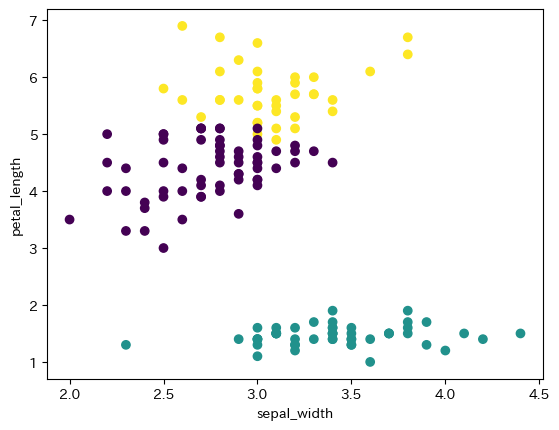

In [5]:
from sklearn.cluster import KMeans

df = pd.read_csv('iris.csv' ,usecols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X = df.to_numpy()
#print(X)

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
print(model.labels_)

#for i in range(0, len(model.labels_)):
#    print(model.labels_[i])

plt.scatter(df['sepal_width'], df['petal_length'], c = model.labels_)
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.show()

### 本当の品種分け（人間がラベルデータで分けた）

●pd.to_numeric() 関数は、Pandasデータフレームやシリーズ内の値を数値に変換するためのメソッド。

errors パラメータを使用して、変換中にエラーが発生した場合の扱いを指定できる。

具体的には、pd.to_numeric(df['species'],  errors='coerce') は、

'species' 列内の値が数値として解釈可能な文字列で構成されている場合、

数値に変換し、変換できない場合は NaN（Not a Number）に置き換える操作を行う。

●errors='coerce' はエラーが発生した場合に NaN に置き換えるオプション

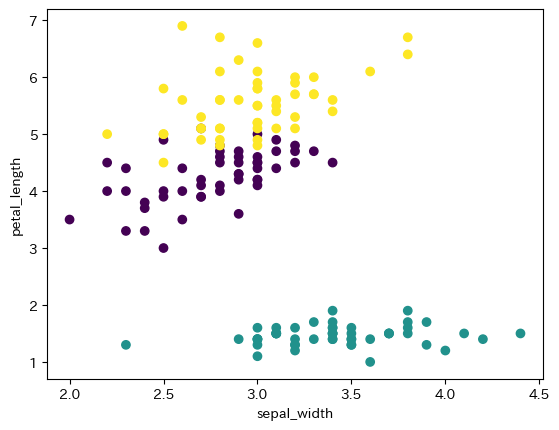

In [6]:
df = pd.read_csv('iris.csv')
X = df[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()

df['species'] = df['species'].str.replace('setosa', "1")
df['species'] = df['species'].str.replace('virginica', "2")
df['species'] = df['species'].str.replace('versicolor', "0")

y = pd.to_numeric(df['species'], errors='coerce')


plt.scatter(df['sepal_width'],df['petal_length'], c = y)
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.show()

### k-means による品種分け(3D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


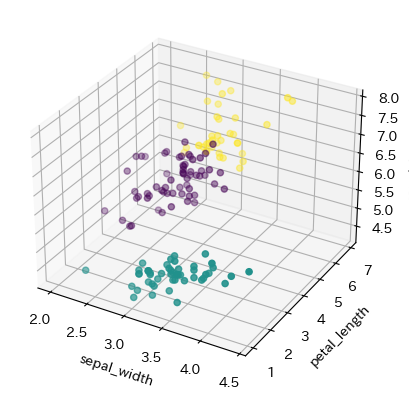

In [8]:
# 10_10.pyの最後の部分のみ変更した。
from sklearn.cluster import KMeans

df = pd.read_csv('iris.csv' ,usecols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X = df.to_numpy()
#print(X)

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
print(model.labels_)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['sepal_width'], df['petal_length'], df['sepal_length'], c = model.labels_)
ax.set_xlabel('sepal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_length')
plt.show()


### 本当の品種分け（人間がラベルデータで分けた）(3D)

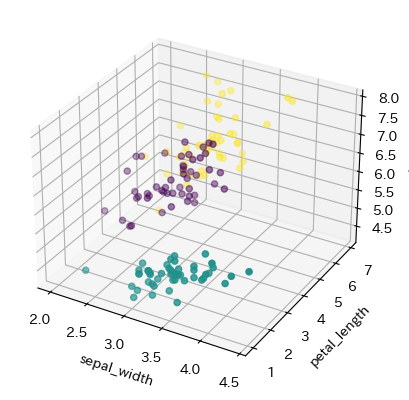

In [9]:
# 10_20.pyの最後の部分のみ変更した。

df = pd.read_csv('iris.csv')
X = df[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()

df['species'] = df['species'].str.replace('setosa', "1")
df['species'] = df['species'].str.replace('virginica', "2")
df['species'] = df['species'].str.replace('versicolor', "0")

y = pd.to_numeric(df['species'], errors='coerce')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['sepal_width'], df['petal_length'], df['sepal_length'], c = y)
ax.set_xlabel('sepal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_length')
plt.show()

ミニ演習

make_blobsで、恣意的ないくつかのグループを作り、

それを k-means でクラスタリングして、

人間の意図とどのように一致するか、あるいは一致しないのかを確認してみる

(1)　make_blobs で重ならない３つのクラスタを作り、

それを k-means（クラスタ数 3 ）でクラスタリングする。

２つの結果を並べて散布図にしてみる

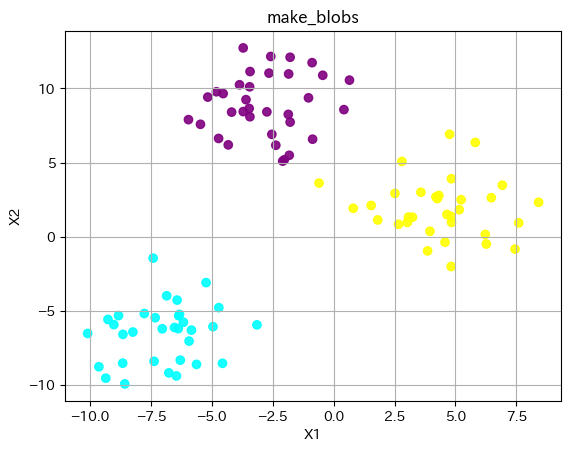

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


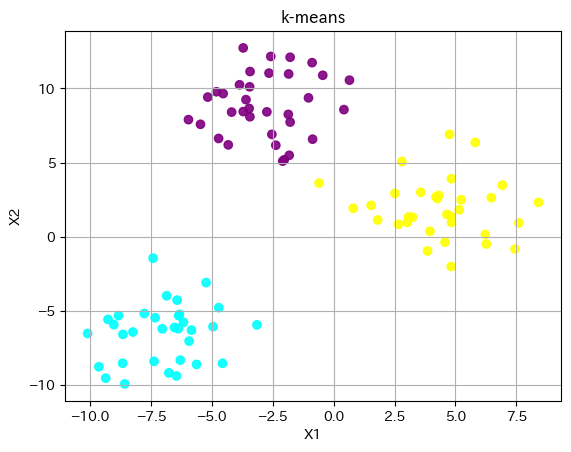

In [26]:
from sklearn.datasets import make_blobs

p_color = np.array(["purple", "yellow", "cyan"])

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42, cluster_std=2.0)

plt.scatter(X[:,0:1], X[:,1:2], c = p_color[y], alpha=0.9)  # alpha は点の透過度
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("make_blobs")
plt.grid()
plt.show()


p_color2 = np.array(["purple", "cyan", "yellow"])

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

# print(model.labels_)

plt.scatter(X[:,0:1], X[:,1:2], c = p_color2[model.labels_], alpha=0.9)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("k-means")
plt.grid()
plt.show()

(2)　make_blobs で３つのクラスタを作り、

それを k-means（クラスタ数 4 ）でクラスタリングする。

２つの結果を並べて散布図にしてみる

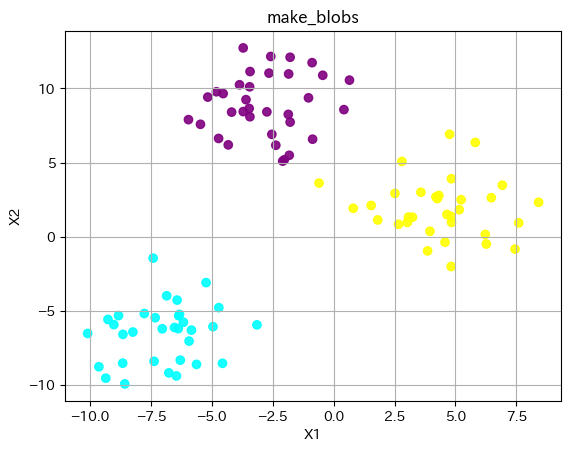

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


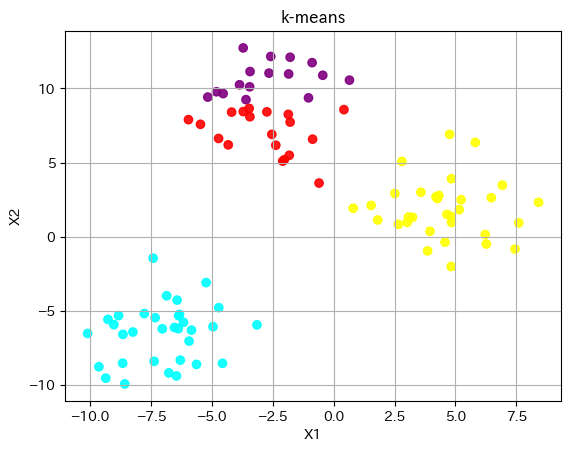

In [30]:
from sklearn.datasets import make_blobs

p_color = np.array(["purple", "yellow", "cyan"])

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42, cluster_std=2.0)

plt.scatter(X[:,0:1], X[:,1:2], c = p_color[y], alpha=0.9)  # alpha は点の透過度
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("make_blobs")
plt.grid()
plt.show()


p_color2 = np.array(["cyan", "yellow", "purple", "red"])

model = KMeans(n_clusters=4, random_state=0)
model.fit(X)

# print(model.labels_)

plt.scatter(X[:,0:1], X[:,1:2], c = p_color2[model.labels_], alpha=0.9)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("k-means")
plt.grid()
plt.show()

(3)　make_blobs で近接する、あるいは、重なりがある３つのクラスタを作り、

それを k-means（クラスタ数 2 ）でクラスタリングする。

２つの結果を並べて散布図にしてみる

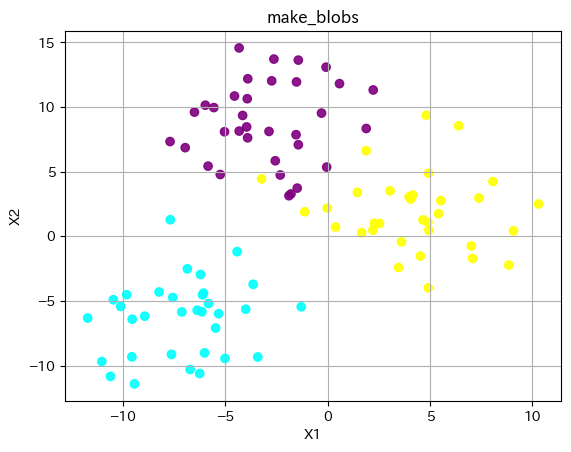

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


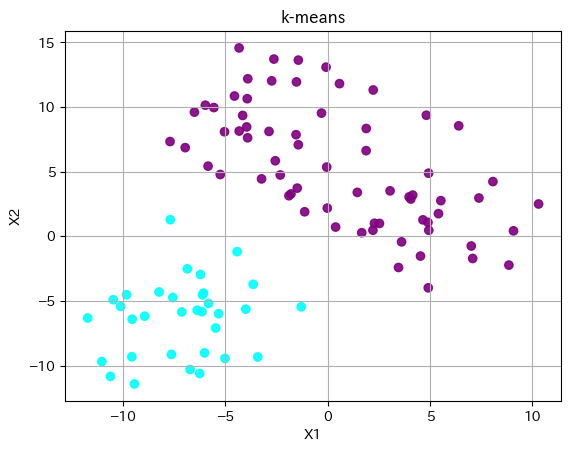

In [31]:
from sklearn.datasets import make_blobs

p_color = np.array(["purple", "yellow", "cyan"])

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42, cluster_std=3.0)

plt.scatter(X[:,0:1], X[:,1:2], c = p_color[y], alpha=0.9)  # alpha は点の透過度
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("make_blobs")
plt.grid()
plt.show()


p_color2 = np.array(["purple", "cyan"])

model = KMeans(n_clusters=2, random_state=0)
model.fit(X)

# print(model.labels_)

plt.scatter(X[:,0:1], X[:,1:2], c = p_color2[model.labels_], alpha=0.9)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("k-means")
plt.grid()
plt.show()

(4)　make_circle でリング状の 2 つのクラスタを作り、

それを k-means（クラスタ数 2 ）でクラスタリングする。

２つの結果を並べて散布図にしてみる

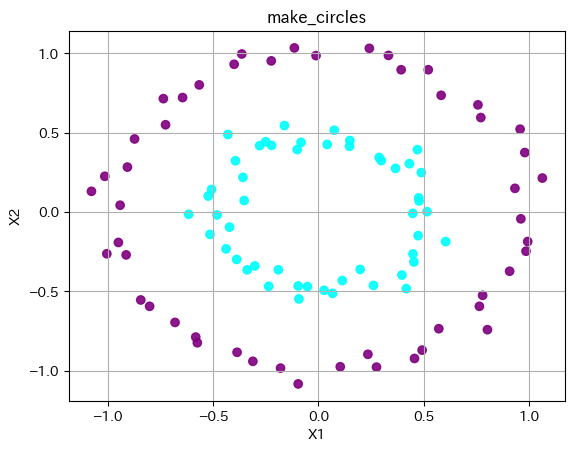

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


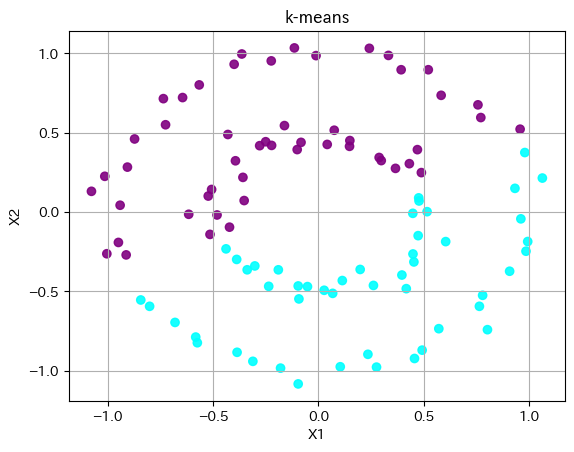

In [33]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

p_color = np.array(["purple", "cyan"])

X, y = make_circles(n_samples=100, noise=0.05, random_state=42, factor=0.5)

plt.scatter(X[:,0:1], X[:,1:2], c = p_color[y], alpha=0.9)  # alpha は点の透過度
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("make_circles")
plt.grid()
plt.show()


p_color2 = np.array(["purple", "cyan"])

model = KMeans(n_clusters=2, random_state=0)
model.fit(X)

# print(model.labels_)

plt.scatter(X[:,0:1], X[:,1:2], c = p_color2[model.labels_], alpha=0.9)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("k-means")
plt.grid()
plt.show()